In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_parameters_3(num_units_x, num_units_L1, num_units_L2, num_units_y):
    """
    初始化计算三层网络的weight和bias项
    """
    
    # weight的shape是(下一层的节点数，上一层的节点数)
    np.random.seed(3)
    W1 = np.random.randn(num_units_L1, num_units_x) * 0.1
    b1 = np.zeros(shape=(num_units_L1, 1))
    W2 = np.random.randn(num_units_L2, num_units_L1) * 0.1
    b2 = np.zeros(shape=(num_units_L2, 1))
    W3 = np.random.randn(num_units_y, num_units_L2) * 0.1
    b3 = np.zeros(shape=(num_units_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [3]:
def initialize_parameters_n(layer_dimentions):
    """
    初始化可自定义神经网络层数的weight和bias
    传入的layer_dimentions是列表，[1,2,3,4]代表第一层(即输入层X)节点数为1，第二层为2，以此类推，第4层(即输出层Y)为4
    """
    
    np.random.seed(3)
    # 记录层数L
    L = len(layer_dimentions)
    parameters = {}
    # 算上输入层共有L层，所以实际要计算的共L-1层，所以weight有L-1个
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dimentions[l], layer_dimentions[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dimentions[l], 1))
        #print('b' + str(l)+ '.shape = ' + str(parameters['b' + str(l)].shape))

    return parameters

In [4]:
def activation_relu(Z):
    Z = np.maximum(0, Z)
    return Z

In [5]:
print(activation_relu(np.random.randn(3,4)))

[[0.         0.         0.         0.        ]
 [0.55469899 0.77661509 0.         0.        ]
 [0.         1.91201631 0.57451838 0.17176723]]


In [6]:
def activation_sigmoid(Z):
    Z = 1 / (1 + np.exp(-Z))
    return Z

In [7]:
print(activation_sigmoid(np.random.randn(3,4)))

[[0.93404033 0.27095508 0.21066288 0.38946652]
 [0.61655104 0.47455385 0.47659128 0.53819507]
 [0.8747573  0.1445259  0.75548924 0.2850665 ]]


In [8]:
def activation_tanh(Z):
    Z = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    return Z

In [9]:
print(activation_tanh(np.random.randn(3,4)))

[[-0.07292549 -0.9474426  -0.7188451   0.11214934]
 [-0.79475681 -0.95169994  0.96233135 -0.17953979]
 [ 0.11195175  0.22682011 -0.43707357  0.66465716]]


In [70]:
def softmax(Z):
    """每一列为一个实例"""
    #print(Z)
    sum_e = np.sum(np.exp(Z),axis=0)
    #print(sum_e)
    Z = np.exp(Z) / sum_e
    return Z

In [11]:
print(softmax(np.random.randn(3,4)))

[[ 1.96699371 -1.2869314  -0.20105464  0.47178171]
 [-0.69329433  0.4430299  -0.92062036  0.27360391]
 [-0.6018457   1.15993733 -1.06568879 -0.79238439]]
[8.19687782 5.02326903 1.56063012 3.37030537]
[[0.87217986 0.05496755 0.52406251 0.4755793 ]
 [0.06098986 0.31004091 0.25519941 0.39008156]
 [0.06683028 0.63499154 0.22073808 0.13433915]]


In [12]:
def linear_prop(A_prev, W, b):
    # A_prev是上一层计算得到的
    Z = np.dot(W, A_prev) + b
    # cache后面用作反向传播
    cache = (A_prev, W, b, Z)
    return Z, cache

In [40]:
def activation_prop(A_prev, W, b, activation):
    """含有激活函数的前向传播"""
    #print('传入的b.shape = ' + str(b.shape))
    if activation == 'sigmoid':
        Z = np.dot(W, A_prev) + b
        A = activation_sigmoid(Z)
        cache = (A_prev, W, b, A)
        return A, cache
    
    elif activation == 'tanh':
        Z = np.dot(W, A_prev) + b
        A = activation_tanh(Z)
        cache = (A_prev, W, b, A)
        return A, cache
    
    elif activation == 'relu':
        #print('b.shape = ' + str(b.shape))
        Z = np.dot(W, A_prev) + b
        #print('计算后Z.shape = ' + str(Z.shape))
        A = activation_relu(Z)
        #print('计算后A.shape = ' + str(A.shape))
        cache = (A_prev, W, b, A)
        return A, cache
    elif activation == 'softmax':
        Z = np.dot(W, A_prev) + b
        A = softmax(Z)
        cache = (A_prev, W, b, A)
    
    else:
        print('error')
        return None

In [82]:
def forward_prop(X, parameters, activation):
    caches = []
    L = len(parameters) // 2
    A = X
       
    if activation == 'linear':
        for l in range(1, L):
            A_prev = A
            A, cache = linear_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
            caches.append(cache)
        
    if activation == 'sigmoid':
        for l in range(1, L):
            A_prev = A
            A, cache = activation_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)],activation = 'sigmoid')
            caches.append(cache)
        
    if activation == 'tanh':
        for l in range(1, L):
            A_prev = A
            A, cache = activation_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)],activation = 'tanh')
            caches.append(cache)
        
    if activation == 'relu':
        for l in range(1, L):
            A_prev = A
            A, cache = activation_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)],activation = 'relu')
            caches.append(cache)
    # 最后一层
    A_prev = A
    A, _ = activation_prop(A_prev, parameters['W'+str(L)], parameters['b' + str(L)], activation = 'relu')
    
    # softmax
    AL = softmax(A)
    cache = (A_prev, parameters['W'+str(L)], parameters['b' + str(L)], AL)
    caches.append(cache)
    assert(AL.shape == (10, X.shape[1]))
    return AL, caches

In [147]:
def compute_cost(Y, AL):
    # m为实例个数
    m = Y.shape[1]
    # cost为交叉熵
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL + 1e-8)) + np.multiply(1 - Y, np.log(1 - AL + 1e-8)))
    #cost = 1 / m * np.sum((AL-Y)**2)
    cost = np.squeeze(cost)
    
    return cost

In [16]:
def linear_backward(dZ, cache):
    '''
    输入Z的梯度
    cache保存了当初计算Z时用的A_prev,W,b
    返回上层计算Z时用的A,W,b的梯度
    '''
    A_prev, W, b, A = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ, A_prev.T)
    db = 1 / m * np.squeeze(np.sum(dZ, axis=1, keepdims=True))
    db = np.reshape(db,(db.shape[0],1))
    #print('一次反向传播后db.shape = ' + str(db.shape))
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [86]:
def relu_backward(dA, cache):
    A_prev, W, b, A = cache
    Z = np.dot(W, A_prev) + b
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [153]:
def activation_backprop(dA, cache, activation):
    """
    输入当前层激活后的函数值与相应的激活函数种类，
    计算激活函数的导数，
    乘上dA后得到dZ，再将dZ交给linear_backward计算，
    返回上层计算Z时用的A,W,b的梯度
    """
    A_prev, W, b, A = cache
    if activation == "relu":
        #dZ = dA * (A > 0)
        dZ = relu_backward(dA, cache)
        dA_prev, dW, db = linear_backward(dZ, cache)
        
    elif activation == "sigmoid":
        dZ = dA * (A * (1 - A))
        dA_prev, dW, db = linear_backward(dZ, cache)
        
    elif activation =='tanh':
        dZ = dA * (1 - np.power(A,2))
        dA_prev, dW, db = linear_backward(dZ, cache)
        
    elif activation =='linear':
        dA_prev, dW, db = linear_backward(dZ, cache)
        
    else:
        print('error')
        return None

    return dA_prev, dW, db

In [18]:
def three_layers_backprop(AL, Y, caches, activation='relu'):
    """
    含有3层神经网络的反向传播
    """
    grads = {}
    L = 3
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -( Y / AL ) + (1 - Y) / (1 - AL)
    dZL = AL - Y
    
    A2, W3, b3 = cache[-1]
    A1, W2, b2 = cache[-2]
    A0, W1, b1 = cache[-3]
    
    m = A0.shape[1]

    dW3 = 1 / m * np.dot(dZL, A2.T)
    db3 = 1 / m * np.squeeze(np.sum(dZL, axis=1, keepdims=True))
    dA2 = np.dot(W3.T, dZL)
    dZ2 = dA2 * (A2 > 0)
    
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.squeeze(np.sum(dZ2, axis=1, keepdims=True))
    dA1 = np.dot(W3.T, dZL)
    dZ1 = dA1 * (A1 > 0)
    
    dW1 = 1 / m * np.dot(dZ1, A0.T)
    db1 = 1 / m * np.squeeze(np.sum(dZ1, axis=1, keepdims=True))
    assert(dW1.shape == W1.shape)
    assert(dW2.shape == W2.shape)
    assert(dW3.shape == W3.shape)
    assert(db1.shape == b1.shape)
    assert(db2.shape == b2.shape)
    assert(db3.shape == b2.shape)
    
    return dW1,dW2,dW3,db1,db2,db3

In [72]:
def L_layers_backprop(AL, Y, caches, activation):
    """
    含有L层神经网络的反向传播
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    # 最后一层激活函数为softmax
    dAL = -( Y / AL ) + (1 - Y) / (1 - AL)
    dZL = AL - Y
    # 获得计算最后一层的cache
    current_cache = caches[-1]
    # 获得计算最后一层的W，b的梯度
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(dZL,current_cache)
    grads["dA" + str(L)] = dAL
    for l in [2,1]:
        # 从倒数第二层开始，即 L-1层,
        dA_prev_temp, dW_temp, db_temp = activation_backprop(grads["dA"+str(l)], caches[l-1], activation='relu')
        grads["dA" + str(l-1)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        #print('grads["dA"{}'.format(l) + str(grads["dA" + str(l)].shape))
    #print(grads.keys())    
    return grads

In [59]:
i = [l for l in reversed(range(1,3))]
print(i)

[2, 1]


In [20]:
print([l for l in reversed(range(1,10))])

[9, 8, 7, 6, 5, 4, 3, 2, 1]


In [21]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    梯度下降,更新参数
    """
    L = len(parameters) // 2
    #print('L(grads)//2 = ' + str(len(grads) // 2) )
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    
    return parameters

In [136]:
def three_layers_nn(X,Y,layers_dimentions,learning_rate=0.03,num_iterations=5001,activation='relu'):
    """
    三层神经网络的模型，
    输入训练集X，标签集Y，三层网络分别的节点数
    默认学习率0.01，训练5000次，激活函数为relu
    """
    grads = {}
    costs = []
    caches = []
    m = X.shape[1] 
    
    parameters = initialize_parameters_n(layers_dimentions)
    """W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]"""
    
    '''print('主函数中W1.shape = ' + str(W1.shape))
    print('主函数中W2.shape = ' + str(W2.shape))
    print('主函数中W3.shape = ' + str(W3.shape))
    print('主函数中b1.shape = ' + str(b1.shape))
    print('主函数中b2.shape = ' + str(b2.shape))
    print('主函数中b3.shape = ' + str(b3.shape))'''
    for i in range(0, num_iterations):
        # 前向传播
        learning_rate_decay = learning_rate * np.power(0.99,i//100)
        A3, caches = forward_prop(X, parameters, activation)
        """
        A0 = X
        A1, cache1 = activation_prop(A0, W1, b1, activation=activation)
        A2, cache2 = activation_prop(A1, W2, b2, activation=activation)
        A3, cache3 = activation_prop(A2, W3, b3, activation=activation)
        caches.append(cache1)
        caches.append(cache2)
        caches.append(cache3)
        """
        # 计算ocst
        cost = compute_cost(Y, A3)
        
        # 反向传播
        #dA3 = - (np.divide(Y, A3+0.0001) - np.divide(1 - Y, (1 - A3)+0.0001))
        #dZ3 = A3 - Y
        grads = L_layers_backprop(A3, Y, caches, activation)
        
        """dA2, dW3, db3 = activation_backprop(dA3, caches[-1], activation='relu')
        dA1, dW2, db2 = activation_backprop(dA2, caches[-2], activation='relu')
        _,dW1,db1 = activation_backprop(dA1,caches[-3],activation='relu')"""
        
        """# 记录梯度
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW3'] = dW3
        grads['db3'] = db3"""
        
        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate_decay)

        """# 将参数记录进字典parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]"""
        #print('一次迭代后b1.shape = ' + str(b1.shape))
        # 每100次打印并记录cost值
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
       
    
    plt.plot(np.squeeze(costs))
    plt.xlabel('iterations (per tens)')
    plt.ylabel('cost')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [1]:
import pickle

def load_file(cifar):
    '''加载cifar数据集'''
    with open('D:\cifar-10-batches-py\\'+str(cifar), 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data
data = load_file('test_batch')
print(data.keys())


dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [2]:
print(data['batch_label'])

testing batch 1 of 1


In [117]:
data_all_x = data['data'] 
data_all_x = data_all_x.T      # shape = (3072, 10000)
data_all_y = data['labels']

data_all_y = np.array(data_all_y)
#print(data1_y.shape)

data_all_y = tf.one_hot(data_all_y, 10, axis = 0)
sess = tf.Session()
data_all_y = sess.run(data_all_y) # shape = (10, 10000)

data1_x = data_all_x[:,0:500]
data1_y = data_all_y[:,0:500]

data_x_test = data_all_x[:,500:]
data_y_test = data_all_y[:,500:]
data_y_test = np.array(data_y_test)


sess.close()

In [77]:
layers_dimentions = [3072,20,15,10]

In [155]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

Cost after iteration 0: 3.25110021697056
Cost after iteration 100: 3.23799221134182
Cost after iteration 200: 3.2009933899111767
Cost after iteration 300: 3.11673778691367
Cost after iteration 400: 3.0275136683139863
Cost after iteration 500: 2.980875065850043
Cost after iteration 600: 2.9407950114663355
Cost after iteration 700: 2.948517452015645
Cost after iteration 800: 2.895761428285215
Cost after iteration 900: 2.8350432614060552
Cost after iteration 1000: 2.7608594044053536
Cost after iteration 1100: 2.68144119190527
Cost after iteration 1200: 2.5902195688845944
Cost after iteration 1300: 2.5068160043609526
Cost after iteration 1400: 2.5028717568110967
Cost after iteration 1500: 2.4863152880706676
Cost after iteration 1600: 2.2191525093332407
Cost after iteration 1700: 2.5251901877318814
Cost after iteration 1800: 2.2079747743989673
Cost after iteration 1900: 2.2461805148675005
Cost after iteration 2000: 2.026579421638606
Cost after iteration 2100: 2.292096531588587
Cost after it

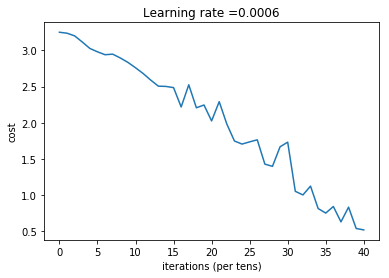

In [158]:
para = three_layers_nn(data1_x,data1_y,layers_dimentions=layers_dimentions,learning_rate=0.0006,num_iterations=4001,activation='relu')

In [39]:
#help(tf.one_hot)

In [145]:
#print(para)

In [143]:
def errors(parameters,X_test,Y_test):
    m = X_test.shape[1]
    Y_pred, _ = forward_prop(X_test, parameters, activation='relu')
    sess = tf.Session()
    errors = tf.reduce_mean((Y_pred - Y_test))
    
    print(sess.run(errors))

In [144]:
errors(para,data_x_test,data_y_test)

1.0665479373211062e-17


In [140]:
def save_para(para):
    
    W1 = tf.Variable(para['W1'], dtype = tf.float32, name = 'W1')
    W2 = tf.Variable(para['W2'], dtype = tf.float32, name = 'W2')
    W3 = tf.Variable(para['W3'], dtype = tf.float32, name = 'W3')
    b1 = tf.Variable(para['b1'], dtype = tf.float32, name = 'b1')
    b2 = tf.Variable(para['b2'], dtype = tf.float32, name = 'b2')
    b3 = tf.Variable(para['b3'], dtype = tf.float32, name = 'b3')
    
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run(init)
        save_path = saver.save(sess, 'D:\cifar-10-batches-py\save_para_with_sigmoid.ckpt')



In [141]:
save_para(para)